In [5]:
import MeCab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from PIL import Image
from wordcloud import WordCloud

In [2]:
plt.rcParams['font.family'] = 'AppleGothic'
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Noto Sans Gothic /System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf
Apple SD Gothic Neo /System/Library/Fonts/AppleSDGothicNeo.ttc
AppleGothic /System/Library/Fonts/Supplemental/AppleGothic.ttf
Hiragino Maru Gothic Pro /System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc


In [7]:
lyric = open('./data/amazarashi.txt','r',encoding='utf-8-sig')
lyric = lyric.read()
lyric

'僕が死のうと思ったのは\nウミネコが桟橋で鳴いたから\n波の随意に浮かんで消える\n過去も啄んで飛んでいけ\n僕が死のうと思ったのは\n誕生日に杏の花が咲いたから\nその木漏れ日でうたた寝したら\n虫の死骸と土になれるかな\n薄荷飴 漁港の灯台\n錆びたアーチ橋 捨てた自転車\n木造の駅のストーブの前で\nどこにも旅立てない心\n今日はまるで昨日みたいだ\n明日を変えるなら今日を変えなきゃ\n分かってる 分かってる けれど\n僕が死のうと思ったのは\n心が空っぽになったから\n満たされないと泣いているのは\nきっと満たされたいと願うから\n僕が死のうと思ったのは\n靴紐が解けたから\n結びなおすのは苦手なんだよ\n人との繋がりもまた然り\n僕が死のうと思ったのは\n少年が僕を見つめていたから\nベッドの上で土下座してるよ\nあの日の僕にごめんなさいと\nパソコンの薄明かり\n上階の部屋の生活音\nインターフォンのチャイムの音\n耳を塞ぐ鳥かごの少年\n見えない敵と戦ってる\n六畳一間のドンキホーテ\nゴールはどうせ酷いものさ\n僕が死のうと思ったのは\n冷たい人と言われたから\n愛されたいと泣いているのは\n人の温もりを知ってしまったから\n僕が死のうと思ったのは\nあなたが綺麗に笑うから\n死ぬことばかり考えてしまうのは\nきっと生きる事に真面目すぎるから\n僕が死のうと思ったのは\nまだあなたに出会ってなかったから\nあなたのような人が生まれた\n世界を少し好きになったよ\nあなたのような人が生きてる\n世界に少し期待するよ'

In [8]:
# reference from  : dev.startialab.blog/etc/a55
# MeCab Japanese install reference: https://qiita.com/paulxll/items/72a2bea9b1d1486ca751

# tokenize Japanese text
mecab = MeCab.Tagger("-Owakati")
tokenized_text = mecab.parse(lyric).replace('\n','')
tokenized_text

'僕 が 死の う と 思っ た の は ウミネコ が 桟橋 で 鳴い た から 波 の 随意 に 浮かん で 消える 過去 も 啄ん で 飛ん で いけ 僕 が 死の う と 思っ た の は 誕生 日 に 杏 の 花 が 咲い た から その 木漏れ日 で うたた寝 し たら 虫 の 死骸 と 土 に なれる か な 薄荷 飴 漁港 の 灯台 錆び た アーチ 橋 捨て た 自転車 木造 の 駅 の ストーブ の 前 で どこ に も 旅立て ない 心 今日 は まるで 昨日 みたい だ 明日 を 変える なら 今日 を 変え なきゃ 分かっ てる 分かっ てる けれど 僕 が 死の う と 思っ た の は 心 が 空っぽ に なっ た から 満たさ れ ない と 泣い て いる の は きっと 満たさ れ たい と 願う から 僕 が 死の う と 思っ た の は 靴 紐 が 解け た から 結び なおす の は 苦手 な ん だ よ 人 と の 繋がり も また 然 り 僕 が 死の う と 思っ た の は 少年 が 僕 を 見つめ て い た から ベッド の 上 で 土下座 し てる よ あの 日 の 僕 に ごめんなさい と パソコン の 薄 明かり 上 階 の 部屋 の 生活 音 インター フォン の チャイム の 音 耳 を 塞ぐ 鳥かご の 少年 見え ない 敵 と 戦っ てる 六 畳 一間 の ドンキホーテ ゴール は どうせ 酷い もの さ 僕 が 死の う と 思っ た の は 冷たい 人 と 言わ れ た から 愛さ れ たい と 泣い て いる の は 人 の 温もり を 知っ て しまっ た から 僕 が 死の う と 思っ た の は あなた が 綺麗 に 笑う から 死ぬ こと ばかり 考え て しまう の は きっと 生きる 事 に 真面目 すぎる から 僕 が 死の う と 思っ た の は まだ あなた に 出会っ て なかっ た から あなた の よう な 人 が 生まれ た 世界 を 少し 好き に なっ た よ あなた の よう な 人 が 生き てる 世界 に 少し 期待 する よ '

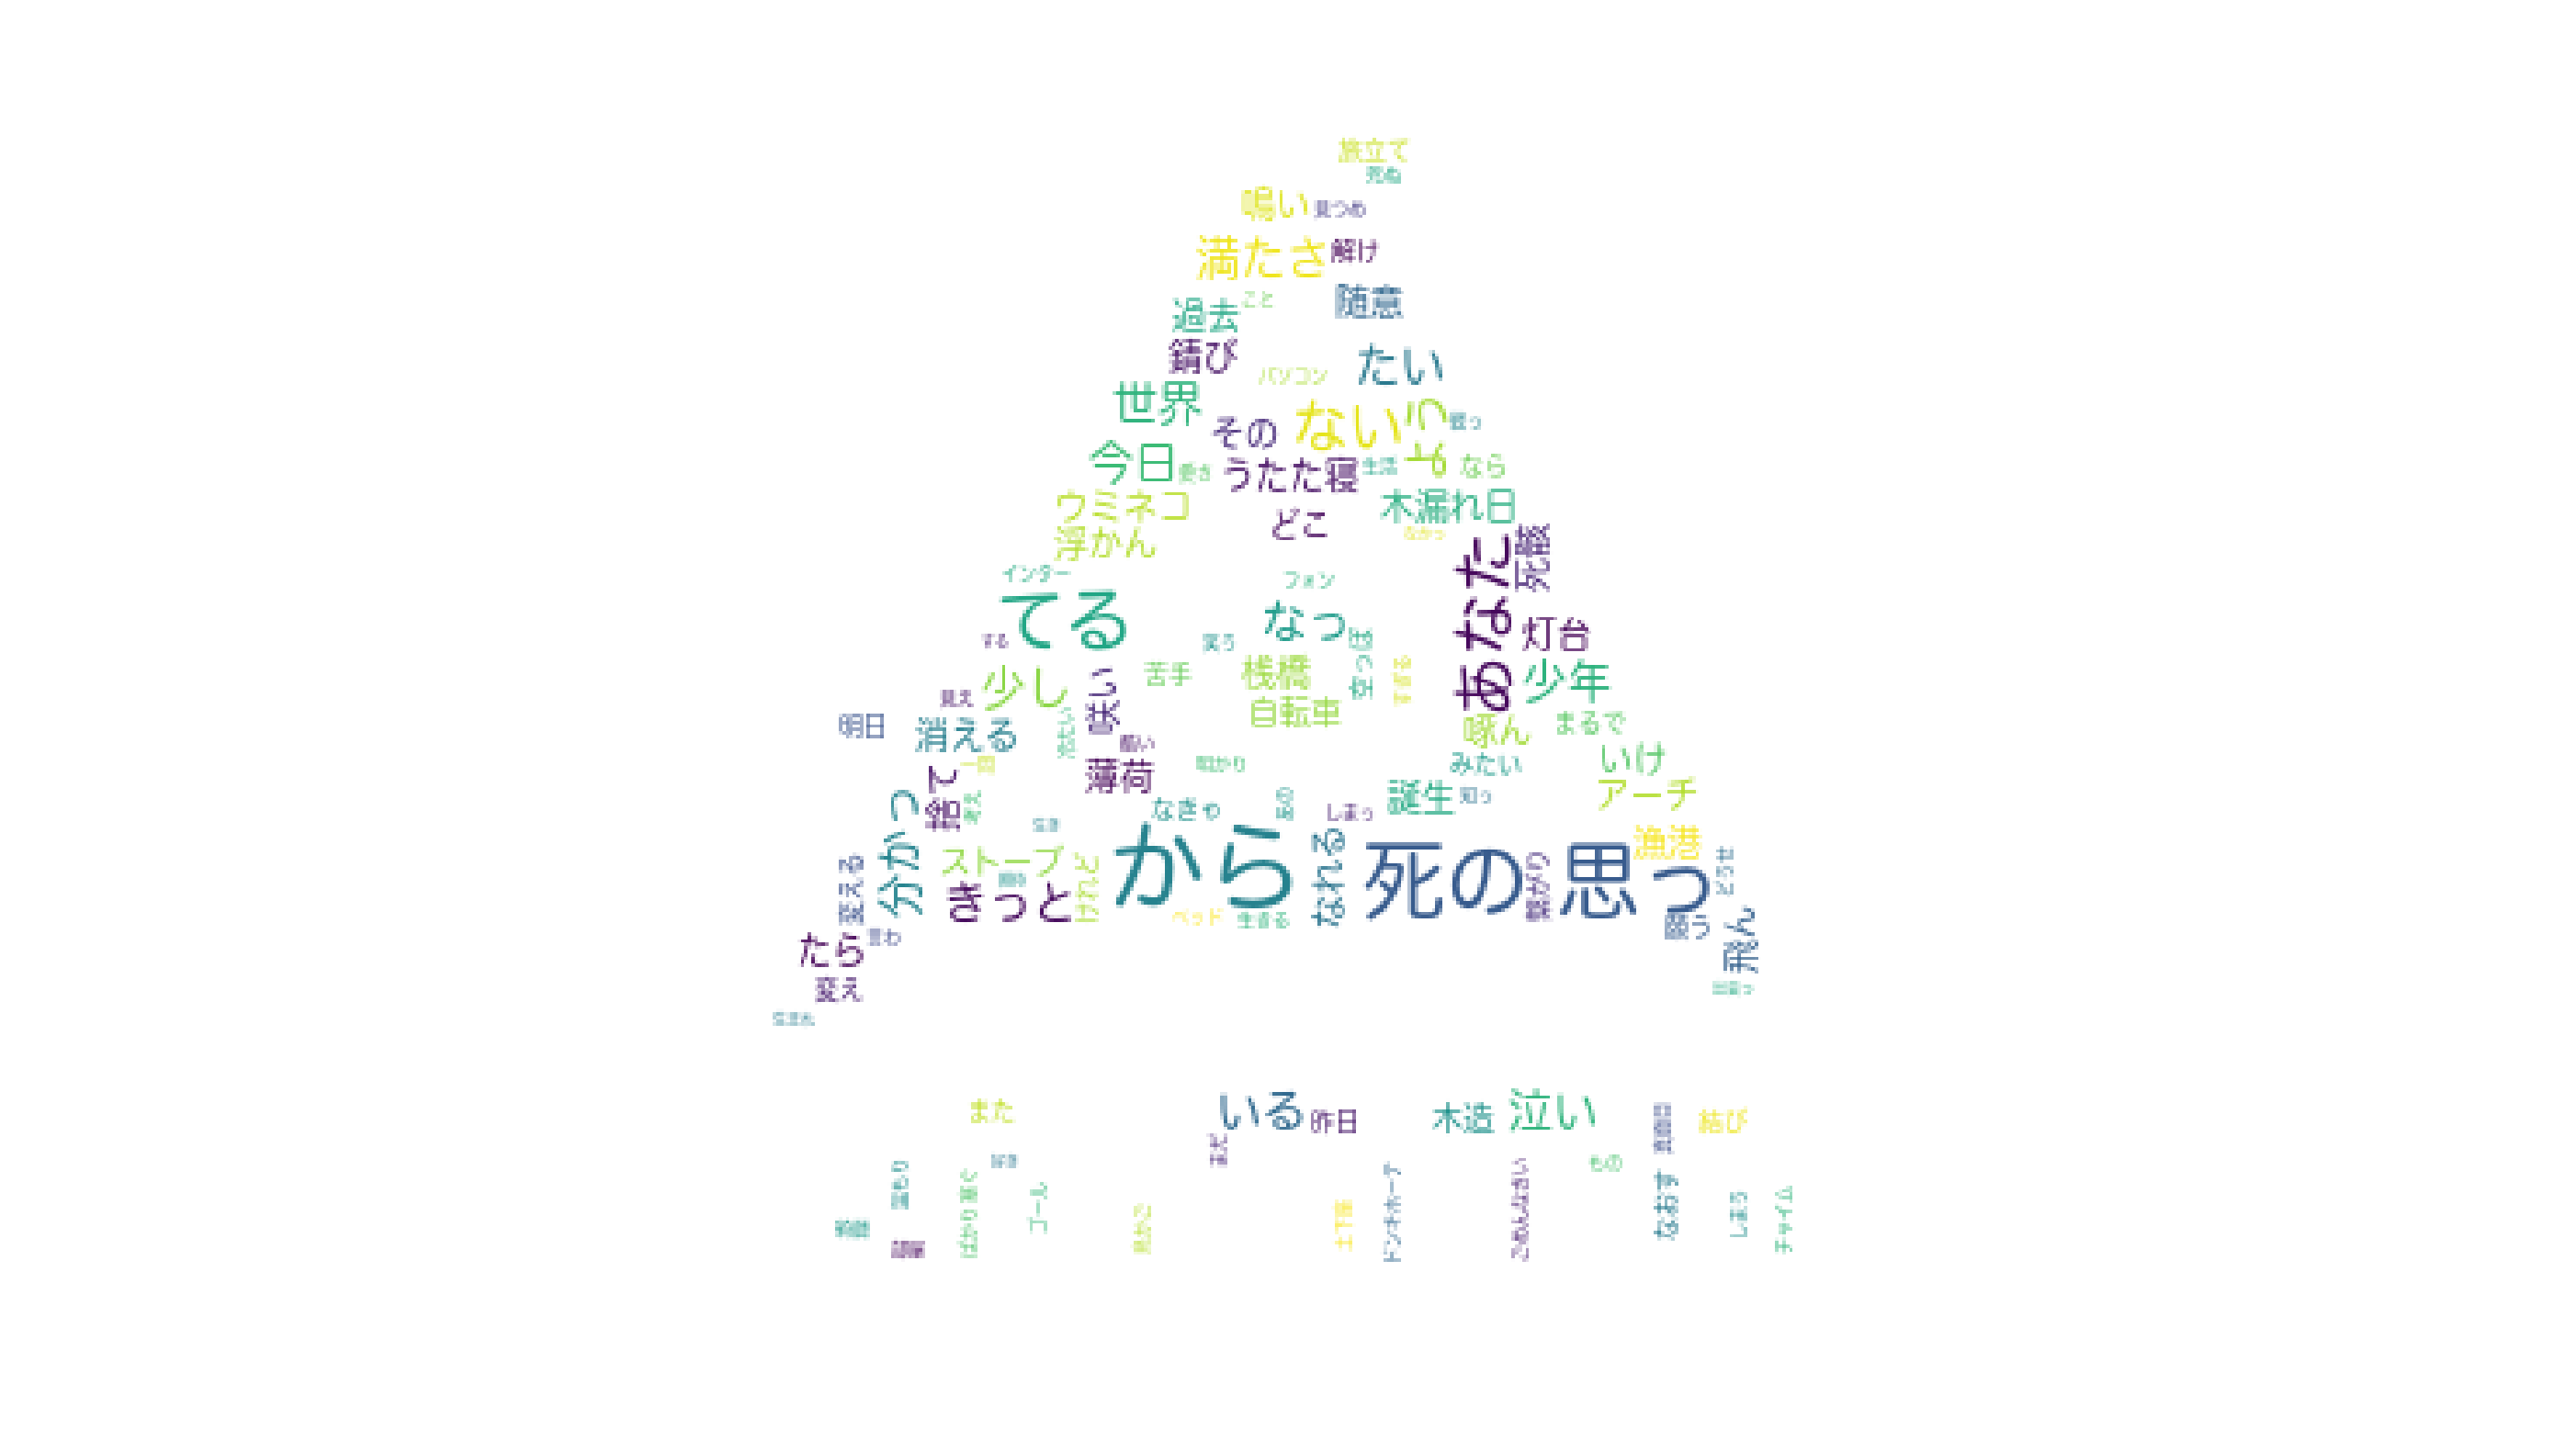

In [24]:
font_path = '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'

mask = np.array(Image.open('./data/amazarashi.jpg'))
wc = WordCloud(font_path=font_path, background_color='white', mask=mask).generate(tokenized_text)

plt.figure(figsize=(50,50))
plt.imshow(wc, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

wc.to_file('amazarashi_wc.png')

In [25]:
enroll_data = pd.read_csv('./data/enrolleds_detail.csv')
enroll_data.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [27]:
format = '%Y-%m-%dT%H:%M:%S.%f'

enroll_data['done_date_time'] = pd.to_datetime(enroll_data['done_date'], format=format)
enroll_data.tail(5)

,lecture_id,done_date,user_id,done_date_time
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006


In [29]:
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

enroll_data['done_date_time_weekday'] = enroll_data['done_date_time'].dt.day_name()
enroll_data['done_date_time_hour'] = enroll_data['done_date_time'].dt.hour
enroll_data.tail(5)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday,done_date_time_hour
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555,Thursday,16
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446,Thursday,16
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday,16
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday,16
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006,Thursday,15


In [52]:
pivot_table = pd.pivot_table(enroll_data, values = 'user_id', aggfunc='count'
                            ,index=['done_date_time_hour']
                            ,columns=['done_date_time_weekday'])
pivot_table

done_date_time_weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
done_date_time_hour,,,,,,,
0,72,79,31,37,39,54,47
1,36,31,17,37,30,27,19
2,20,30,10,45,10,20,12
3,9,27,22,30,15,12,8
4,5,3,7,20,14,6,10
5,1,5,4,20,2,3,15
6,5,19,4,9,5,6,14
7,2,14,19,21,11,14,4
8,10,28,9,27,10,20,23


In [55]:
compare_data = pd.DataFrame(pivot_table, columns=["Monday", "Tuesday"])
compare_data

,Monday,Tuesday
done_date_time_hour,,
0,79,54
1,31,27
2,30,20
3,27,12
4,3,6
5,5,3
6,19,6
7,14,14
8,28,20


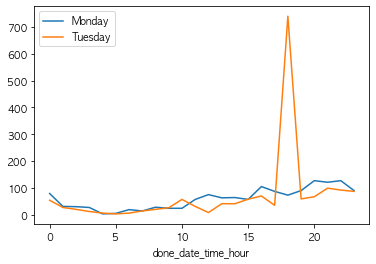

In [56]:
compare_data.plot()